In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

%matplotlib inline

In [2]:
data = pd.read_csv("diabetes-dataset.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
X = data["Glucose"].to_numpy()
y = data["Outcome"].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Text(0, 0.5, 'diabetes')

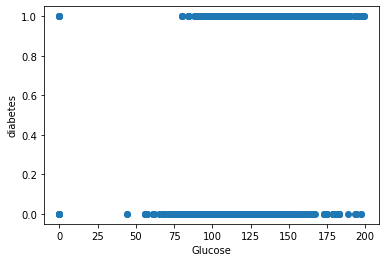

In [6]:
plt.scatter(X_train, y_train)
plt.xlabel("Glucose")
plt.ylabel("diabetes")

In [7]:
X_train = X_train.reshape(-1, 1)
reg = LinearRegression().fit(X_train, y_train)

In [8]:
reg.intercept_, reg.coef_

(-0.5035706156452127, array([0.00700057]))

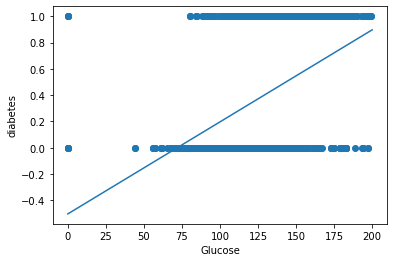

In [9]:
x = np.linspace(0, 200, 1000)
y = reg.intercept_ + reg.coef_*x

plt.scatter(X_train, y_train)
plt.xlabel("Glucose")
plt.ylabel("diabetes")
plt.plot(x, y)

In [10]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [11]:
log_reg.intercept_, log_reg.coef_

(array([-5.39308797]), array([[0.03792405]]))

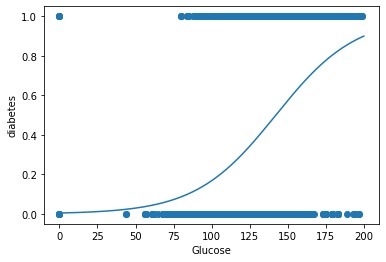

In [12]:
x = np.linspace(0, 200, 1000)
y = 1 / (1 + np.exp(-(log_reg.intercept_ + log_reg.coef_*x)))
y = y.reshape(1000,)

plt.scatter(X_train, y_train)
plt.xlabel("Glucose")
plt.ylabel("diabetes")
plt.plot(x, y)

In [13]:
X = data.iloc[:,0:8].to_numpy()
y = data["Outcome"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 8), (400, 8), (1600,), (400,))

In [15]:
scaler = StandardScaler().fit(X_train)

In [16]:
X_train_scaled = scaler.transform(X_train)

In [17]:
log_reg = LogisticRegression().fit(X_train_scaled, y_train)

In [18]:
test_scaled = scaler.transform(X_test)

In [19]:
y_pred_1 = log_reg.predict(test_scaled)
sum(y_pred_1==y_test)/y_pred_1.size

0.7875

In [21]:
confusion_matrix(y_test, y_pred_1)

array([[239,  30],
       [ 55,  76]], dtype=int64)